In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


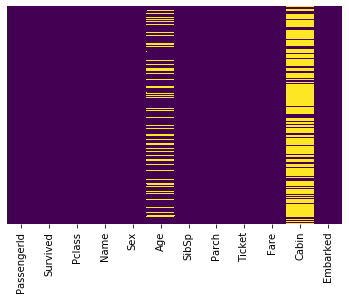

In [4]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
# CREATES HEATMAP FOR THE EMPTY SPACES OR THE VALUES THAT HAVEN'T BEEN PROVIDED
# THIS WILL CREATE THE YELLOW LINES FOR THE EMPTY OR NULL VARIABLES IN THE CSV FILE
# CBAR = COLOR BAR (NO NEED OF BAR GRAPH)
# CMAP = COLOR MAP (WHICH WE ARENT DOING ANY COLOR GRAPH TO USE THIS LIBRARY)

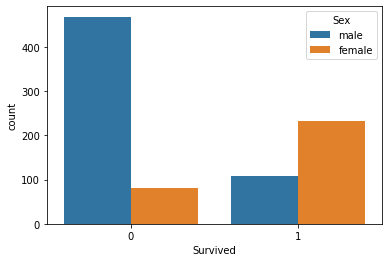

In [5]:
sns.countplot(x = "Survived", hue = 'Sex', data = df)

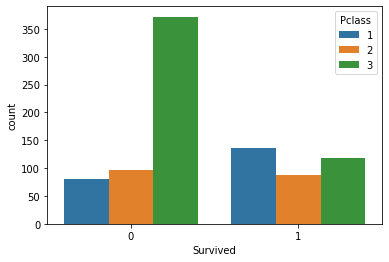

In [6]:
sns.countplot(x = "Survived", hue = 'Pclass', data = df)

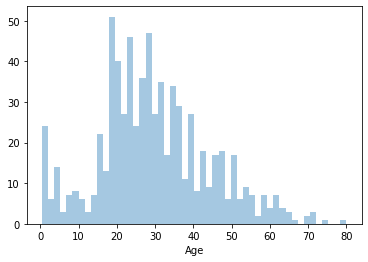

In [7]:
sns.distplot(df['Age'].dropna(), kde = False, bins = 50) # HELPS IN CREATING BAR GRAPH EASILY #

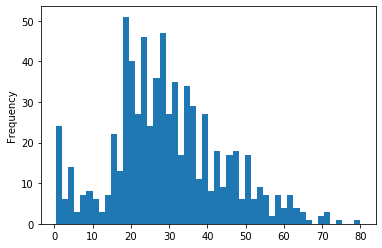

In [8]:
df["Age"].plot.hist(bins = 50)

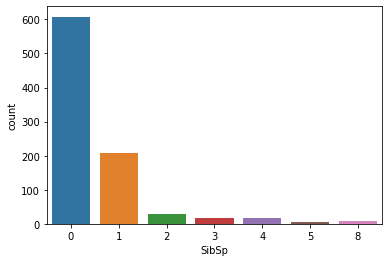

In [9]:
sns.countplot(x = "SibSp", data = df)

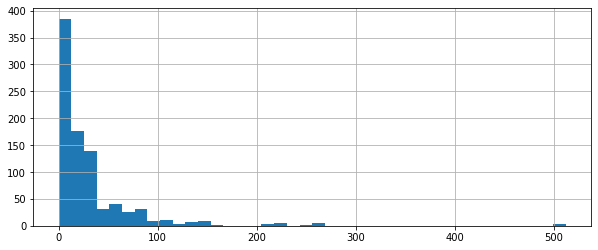

In [10]:
df["Fare"].hist(bins = 40, figsize = (10,4)) # FIGSIZE HELPS IN EXTENDING THE SIZE OF GRAPH # 

In [11]:
import cufflinks as cf

In [12]:
cf.go_offline()

In [13]:
df['Fare'].iplot(kind = 'hist', bins = 50)

In [14]:
# TO FILL THE AGE COLUMNS WHICH ARE EMPTY. BY TAKING THE AVERAGE OF ALL PAASNEGERS #
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 2
        
    else:
        return Age

In [15]:
df['Age'] = df[['Age', 'Pclass']].apply(age, axis = 1)

In [16]:
cabindrop = df.drop('Cabin', axis = 1, inplace = True)

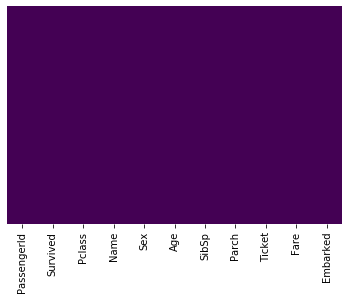

In [17]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [18]:
namedrop = df.drop('Name', axis = 1, inplace = True)
# WE REMOVED THE COLUMN BECAUSE THE NAME DOESN'T MATTER IN THE PERSONS HO GONA DIE #

In [19]:
gender = pd.get_dummies(df['Sex'], drop_first = True)

In [20]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [21]:
df = pd.concat([df, gender, embark], axis = 1)
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [22]:
extradrop = df.drop(['Sex', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 100)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

C:\Users\varun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
prediction = lr.predict(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       159
           1       0.80      0.66      0.72       109

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, prediction)

array([[141,  18],
       [ 37,  72]], dtype=int64)